In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# STEP 2: Install the latest stable Transformers library
!pip install -q transformers


In [ ]:
# STEP 3: Load Train and Test datasets

import pandas as pd

# Update the paths if your files are stored somewhere else
train_path = '/content/drive/MyDrive/INFO 617/INFO 617 Group Project Train Val.xlsx'
test_path = '/content/drive/MyDrive/INFO 617/INFO 617_Group Project Test Set.xlsx'

# Load datasets
train_df = pd.read_excel(train_path)
test_df = pd.read_excel(test_path)

# Quick preview
print("Train Dataset Preview:")
print(train_df.head())

print("\nTest Dataset Preview:")
print(test_df.head())

print("\nTrain Columns:", train_df.columns)
print("Test Columns:", test_df.columns)


Train Dataset Preview:
                                            Sentence      Label
0                                             Hello,      GREET
1   the rubella virus IgM was detected at around ...     REPEAT
2  which has a 50% chance of causing intrauterine...  DIAGNOISE
3  Intrauterine infection can lead to risks such ...    EXPLAIN
4  Please note that these risks may or may not oc...    EXPLAIN

Test Dataset Preview:
                                            Sentence      Label
0  I have calculated it for you, and your BMI is ...  DIAGNOISE
1  In this case, you need to eat more carbohydrat...      TREAT
2  Normally, you should consume 6-8 liang of stap...      TREAT
3  With this, your weight should increase by 8 li...    EXPLAIN
4  When dining outside or buying takeaway, you sh...      TREAT

Train Columns: Index(['Sentence', 'Label'], dtype='object')
Test Columns: Index(['Sentence', 'Label'], dtype='object')


In [ ]:
# STEP 4: Check Class Distribution in Train Set
print("Class Distribution in Train Set:\n")
print(train_df['Label'].value_counts())


Class Distribution in Train Set:

Label
TREAT                  1188
EXPLAIN                1061
DIAGNOISE               381
QUES                    267
REFERRAL                222
THANK                   145
WAIT                    139
GREET                   120
RECEIVE                 110
REPEAT                   86
CONSOLE                  78
REMIND                   78
WISH                     64
REQUEST_INFORMATION      55
FUTURE_SUPPORT           36
Name: count, dtype: int64


In [ ]:
# STEP 5: Encode Labels and Create Mappings

from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
train_df['label_id'] = le.fit_transform(train_df['Label'])
test_df['label_id'] = le.transform(test_df['Label'])

# Mapping dictionaries
label_to_id = dict(zip(le.classes_, le.transform(le.classes_)))
id_to_label = dict(zip(le.transform(le.classes_), le.classes_))

print("Label to ID mapping:")
print(label_to_id)


Label to ID mapping:
{'CONSOLE': np.int64(0), 'DIAGNOISE': np.int64(1), 'EXPLAIN': np.int64(2), 'FUTURE_SUPPORT': np.int64(3), 'GREET': np.int64(4), 'QUES': np.int64(5), 'RECEIVE': np.int64(6), 'REFERRAL': np.int64(7), 'REMIND': np.int64(8), 'REPEAT': np.int64(9), 'REQUEST_INFORMATION': np.int64(10), 'THANK': np.int64(11), 'TREAT': np.int64(12), 'WAIT': np.int64(13), 'WISH': np.int64(14)}


In [ ]:
# STEP 6: Compute Class Weights

import torch
import numpy as np

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label_id']),
    y=train_df['label_id']
)

class_weights = torch.tensor(class_weights, dtype=torch.float)

print("Class Weights Computed!")


Class Weights Computed!


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class_weights = class_weights.to(device)


In [ ]:
# STEP 7: Load DeBERTa-v3-large model and tokenizer

from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = 'microsoft/deberta-v3-large'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_to_id)
)

print("DeBERTa-v3-large Model and Tokenizer Loaded!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/874M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/874M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DeBERTa-v3-large Model and Tokenizer Loaded!


In [ ]:
# STEP 8: Create Dataset Class

from torch.utils.data import Dataset, DataLoader

class MedicalDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.texts = dataframe['Sentence']
        self.labels = dataframe['label_id']
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        text = str(self.texts.iloc[index])
        inputs = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels.iloc[index], dtype=torch.long)
        }

# Parameters
max_len = 80
batch_size = 8

# Create Datasets
train_dataset = MedicalDataset(train_df, tokenizer, max_len)
test_dataset = MedicalDataset(test_df, tokenizer, max_len)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created!")


DataLoaders created!


In [ ]:
# STEP 9: Define Focal Loss Class

import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.alpha, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Initialize Focal Loss
loss_fn = FocalLoss(alpha=class_weights.to(model.device))
print("Focal Loss ready!")


Focal Loss ready!


In [ ]:
# After moving class_weights to device
loss_fn = FocalLoss(alpha=class_weights)


In [ ]:
# STEP 10: Optimizer and Scheduler

from torch.optim import AdamW
from transformers import get_cosine_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=2e-5)

epochs = 15
total_steps = len(train_loader) * epochs

scheduler = get_cosine_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

print("Optimizer and Cosine Scheduler ready!")


Optimizer and Cosine Scheduler ready!


In [ ]:

import random
import numpy as np
import torch

# Set a DIFFERENT random seed each time
seed = 42

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(seed)


In [ ]:
# STEP 11: Training Loop

from sklearn.metrics import accuracy_score
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

best_val_loss = float('inf')
patience = 3
early_stop_counter = 0

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Training
    model.train()
    total_train_loss = 0
    true_labels_train = []
    pred_labels_train = []

    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask']
        )
        logits = outputs.logits
        loss = loss_fn(logits, batch['labels'])

        total_train_loss += loss.item()

        preds = torch.argmax(logits, dim=1)
        true_labels_train.extend(batch['labels'].detach().cpu().numpy())
        pred_labels_train.extend(preds.detach().cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_loader)
    train_acc = accuracy_score(true_labels_train, pred_labels_train)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    total_val_loss = 0
    true_labels_val = []
    pred_labels_val = []

    with torch.no_grad():
        for batch in test_loader:
            batch = {k: v.to(device) for k, v in batch.items()}

            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask']
            )
            logits = outputs.logits
            loss = loss_fn(logits, batch['labels'])

            total_val_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            true_labels_val.extend(batch['labels'].detach().cpu().numpy())
            pred_labels_val.extend(preds.detach().cpu().numpy())

    avg_val_loss = total_val_loss / len(test_loader)
    val_acc = accuracy_score(true_labels_val, pred_labels_val)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Val Loss:   {avg_val_loss:.4f} | Val Acc:   {val_acc:.4f}")

    # Early Stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_deberta_large_model.pt')
        print("Validation loss decreased! Model saved.")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered!")
            break


Epoch 1/15
Train Loss: 1.4535 | Train Acc: 0.2841
Val Loss:   0.7599 | Val Acc:   0.4204
Validation loss decreased! Model saved.

Epoch 2/15
Train Loss: 0.5159 | Train Acc: 0.6598
Val Loss:   0.5380 | Val Acc:   0.7464
Validation loss decreased! Model saved.

Epoch 3/15
Train Loss: 0.3102 | Train Acc: 0.7836
Val Loss:   0.4271 | Val Acc:   0.7742
Validation loss decreased! Model saved.

Epoch 4/15
Train Loss: 0.1864 | Train Acc: 0.8434
Val Loss:   0.5340 | Val Acc:   0.8138

Epoch 5/15
Train Loss: 0.1160 | Train Acc: 0.8881
Val Loss:   0.6802 | Val Acc:   0.8214

Epoch 6/15
Train Loss: 0.0756 | Train Acc: 0.9313
Val Loss:   0.6352 | Val Acc:   0.8214
Early stopping triggered!


In [ ]:
# Save the model separately each time
torch.save(model.state_dict(), f'best_deberta_large_model_seed42.pt')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import torch

# Put model into evaluation mode
model.eval()

true_labels = []
pred_labels = []

# No gradient calculation needed
with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask']
        )
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        true_labels.extend(batch['labels'].cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(true_labels, pred_labels)
print(f"\n Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels))



✅ Test Accuracy: 0.8214

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.69      0.74      0.72       119
           2       0.78      0.71      0.75       316
           3       1.00      0.75      0.86         8
           4       1.00      0.97      0.98        29
           5       0.99      0.94      0.96       109
           6       0.97      0.97      0.97        37
           7       0.77      0.93      0.84        74
           8       0.71      0.95      0.82        21
           9       0.45      0.60      0.51        30
          10       0.91      0.50      0.65        20
          11       0.91      0.95      0.93        43
          12       0.84      0.85      0.85       281
          13       0.94      0.94      0.94        52
          14       0.87      0.95      0.91        21

    accuracy                           0.82      1187
   macro avg       0.85      0.

In [ ]:

import random
import numpy as np
import torch

# Set a DIFFERENT random seed each time
seed = 43

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(seed)


In [ ]:
# STEP 11: Training Loop

from sklearn.metrics import accuracy_score
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

best_val_loss = float('inf')
patience = 3
early_stop_counter = 0

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Training
    model.train()
    total_train_loss = 0
    true_labels_train = []
    pred_labels_train = []

    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask']
        )
        logits = outputs.logits
        loss = loss_fn(logits, batch['labels'])

        total_train_loss += loss.item()

        preds = torch.argmax(logits, dim=1)
        true_labels_train.extend(batch['labels'].detach().cpu().numpy())
        pred_labels_train.extend(preds.detach().cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_loader)
    train_acc = accuracy_score(true_labels_train, pred_labels_train)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    total_val_loss = 0
    true_labels_val = []
    pred_labels_val = []

    with torch.no_grad():
        for batch in test_loader:
            batch = {k: v.to(device) for k, v in batch.items()}

            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask']
            )
            logits = outputs.logits
            loss = loss_fn(logits, batch['labels'])

            total_val_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            true_labels_val.extend(batch['labels'].detach().cpu().numpy())
            pred_labels_val.extend(preds.detach().cpu().numpy())

    avg_val_loss = total_val_loss / len(test_loader)
    val_acc = accuracy_score(true_labels_val, pred_labels_val)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Val Loss:   {avg_val_loss:.4f} | Val Acc:   {val_acc:.4f}")

    # Early Stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_deberta_large_model.pt')
        print("Validation loss decreased! Model saved.")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered!")
            break


Epoch 1/15
Train Loss: 0.0547 | Train Acc: 0.9563
Val Loss:   0.5627 | Val Acc:   0.8239
Validation loss decreased! Model saved.

Epoch 2/15
Train Loss: 0.0390 | Train Acc: 0.9742
Val Loss:   0.5699 | Val Acc:   0.8357

Epoch 3/15
Train Loss: 0.0302 | Train Acc: 0.9806
Val Loss:   0.5973 | Val Acc:   0.8433

Epoch 4/15
Train Loss: 0.0262 | Train Acc: 0.9891
Val Loss:   0.5542 | Val Acc:   0.8357
Validation loss decreased! Model saved.

Epoch 5/15
Train Loss: 0.0190 | Train Acc: 0.9940
Val Loss:   0.5877 | Val Acc:   0.8332

Epoch 6/15
Train Loss: 0.0139 | Train Acc: 0.9968
Val Loss:   0.5604 | Val Acc:   0.8340

Epoch 7/15
Train Loss: 0.0115 | Train Acc: 0.9973
Val Loss:   0.5561 | Val Acc:   0.8357
Early stopping triggered!


In [ ]:
# Save the model separately each time
torch.save(model.state_dict(), f'best_deberta_large_model_seed43.pt')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import torch

# Put model into evaluation mode
model.eval()

true_labels = []
pred_labels = []

# No gradient calculation needed
with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask']
        )
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        true_labels.extend(batch['labels'].cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(true_labels, pred_labels)
print(f"\n Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels))



 Test Accuracy: 0.8357

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.71      0.71      0.71       119
           2       0.84      0.71      0.77       316
           3       0.86      0.75      0.80         8
           4       0.97      0.97      0.97        29
           5       0.99      0.97      0.98       109
           6       1.00      0.97      0.99        37
           7       0.75      0.96      0.84        74
           8       0.70      0.90      0.79        21
           9       0.50      0.70      0.58        30
          10       0.65      0.65      0.65        20
          11       0.93      0.95      0.94        43
          12       0.85      0.88      0.86       281
          13       0.98      0.96      0.97        52
          14       0.91      0.95      0.93        21

    accuracy                           0.84      1187
   macro avg       0.83      0.8

In [ ]:
label_names = [
    'CONSOLE', 'DIAGNOISE', 'EXPLAIN', 'FUTURE_SUPPORT', 'GREET',
    'QUES', 'RECEIVE', 'REFERRAL', 'REMIND', 'REPEAT',
    'REQUEST_INFORMATION', 'THANK', 'TREAT', 'WAIT', 'WISH'
]



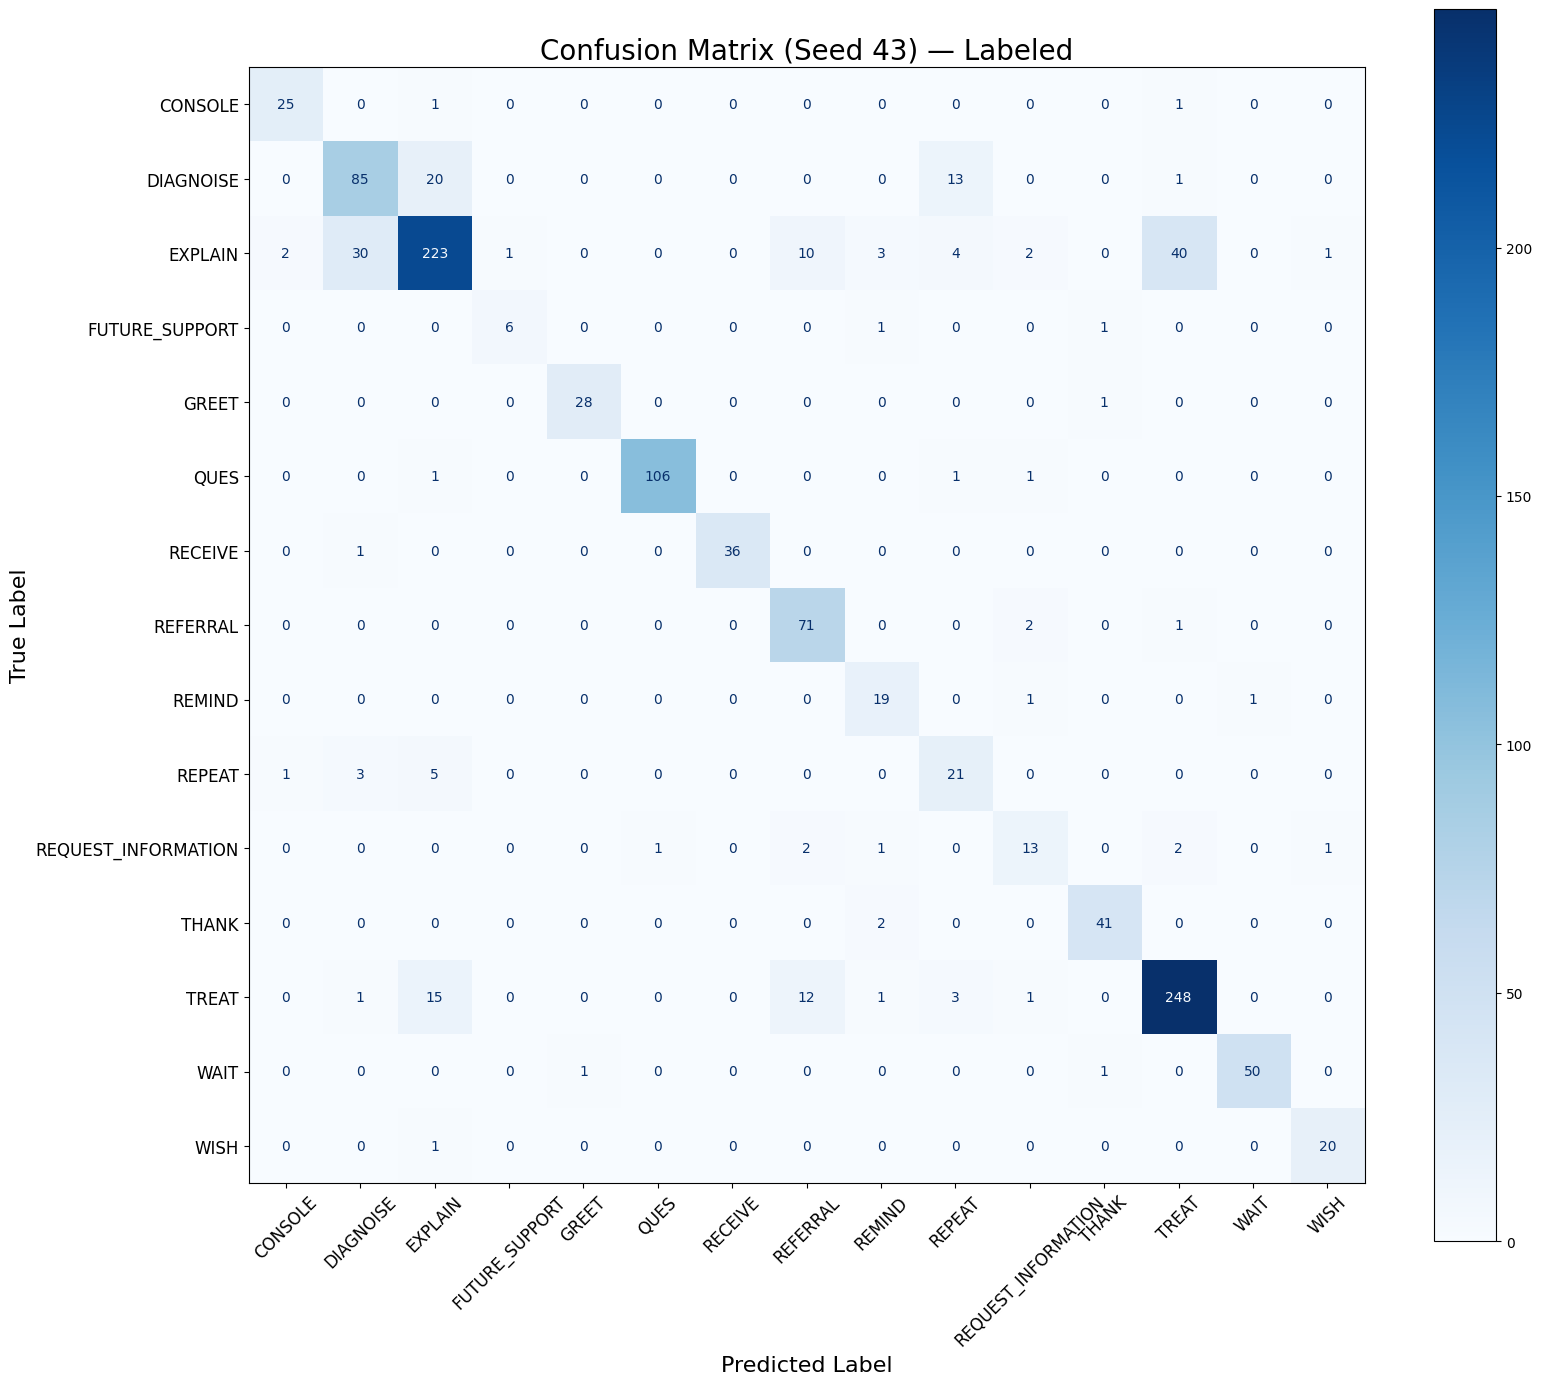

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot
fig, ax = plt.subplots(figsize=(18, 16))  # ⬅️ Increased size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap='Blues', xticks_rotation=45, ax=ax, values_format='d')
plt.title('Confusion Matrix (Seed 43) — Labeled', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.grid(False)
plt.show()



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming true_labels and pred_labels are already defined

# Compute confusion matrix per class
mcm = multilabel_confusion_matrix(true_labels, pred_labels)

# Initialize list to store results
metrics = []

for i, matrix in enumerate(mcm):
    tn, fp, fn, tp = matrix.ravel()
    metrics.append({
        'Class': id_to_label[i],
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn,
        'Precision': tp / (tp + fp + 1e-9),
        'Recall': tp / (tp + fn + 1e-9),
        'Specificity': tn / (tn + fp + 1e-9)
    })

# Create a summary DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                  Class   TP  FP  FN    TN  Precision    Recall  Specificity
0               CONSOLE   25   3   2  1157   0.892857  0.925926     0.997414
1             DIAGNOISE   85  35  34  1033   0.708333  0.714286     0.967228
2               EXPLAIN  223  43  93   828   0.838346  0.705696     0.950631
3        FUTURE_SUPPORT    6   1   2  1178   0.857143  0.750000     0.999152
4                 GREET   28   1   1  1157   0.965517  0.965517     0.999136
5                  QUES  106   1   3  1077   0.990654  0.972477     0.999072
6               RECEIVE   36   0   1  1150   1.000000  0.972973     1.000000
7              REFERRAL   71  24   3  1089   0.747368  0.959459     0.978437
8                REMIND   19   8   2  1158   0.703704  0.904762     0.993139
9                REPEAT   21  21   9  1136   0.500000  0.700000     0.981850
10  REQUEST_INFORMATION   13   7   7  1160   0.650000  0.650000     0.994002
11                THANK   41   3   2  1141   0.931818  0.953488     0.997378

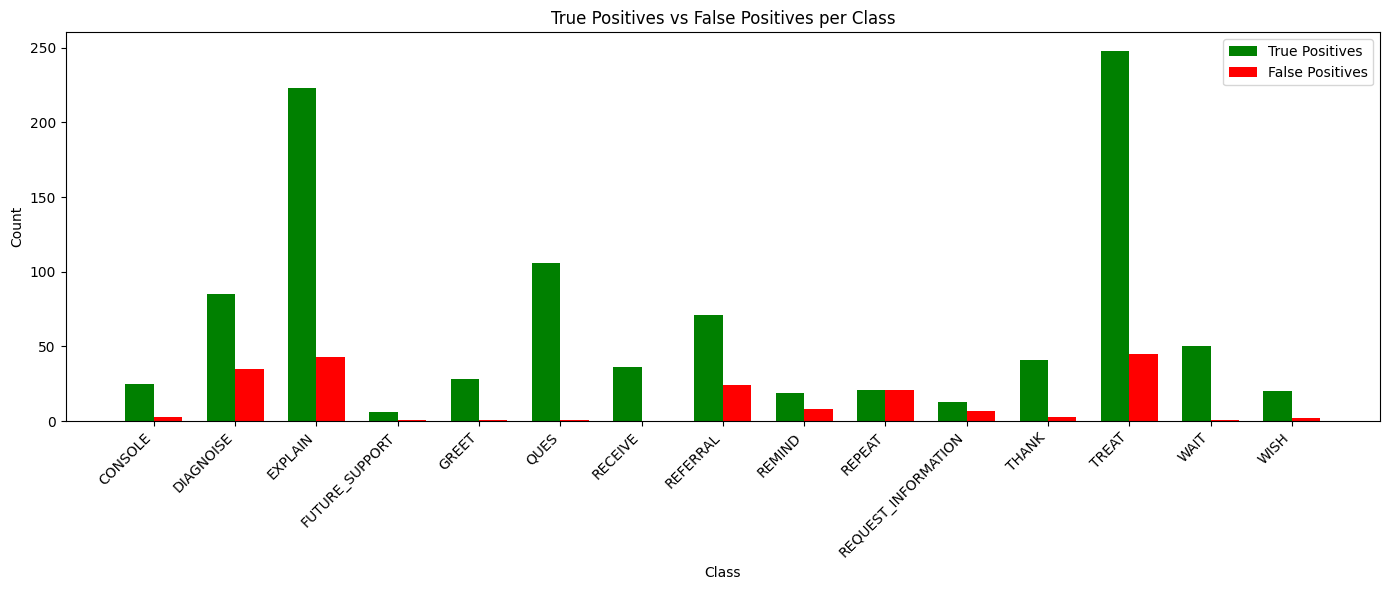

In [ ]:
# Bar chart for TP and FP

plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(len(metrics_df))

plt.bar(index, metrics_df['TP'], bar_width, label='True Positives', color='green')
plt.bar([i + bar_width for i in index], metrics_df['FP'], bar_width, label='False Positives', color='red')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('True Positives vs False Positives per Class')
plt.xticks([i + bar_width/2 for i in index], metrics_df['Class'], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-33-27fe61ae02aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='TP', data=metrics_df, ax=axes[0], palette="Greens_d")
<ipython-input-33-27fe61ae02aa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='FP', data=metrics_df, ax=axes[1], palette="Reds_d")
<ipython-input-33-27fe61ae02aa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='FN', data=metrics_df, ax=axes[2], palette="Oranges_d")
<ipython-input-33-27fe61ae02aa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is de

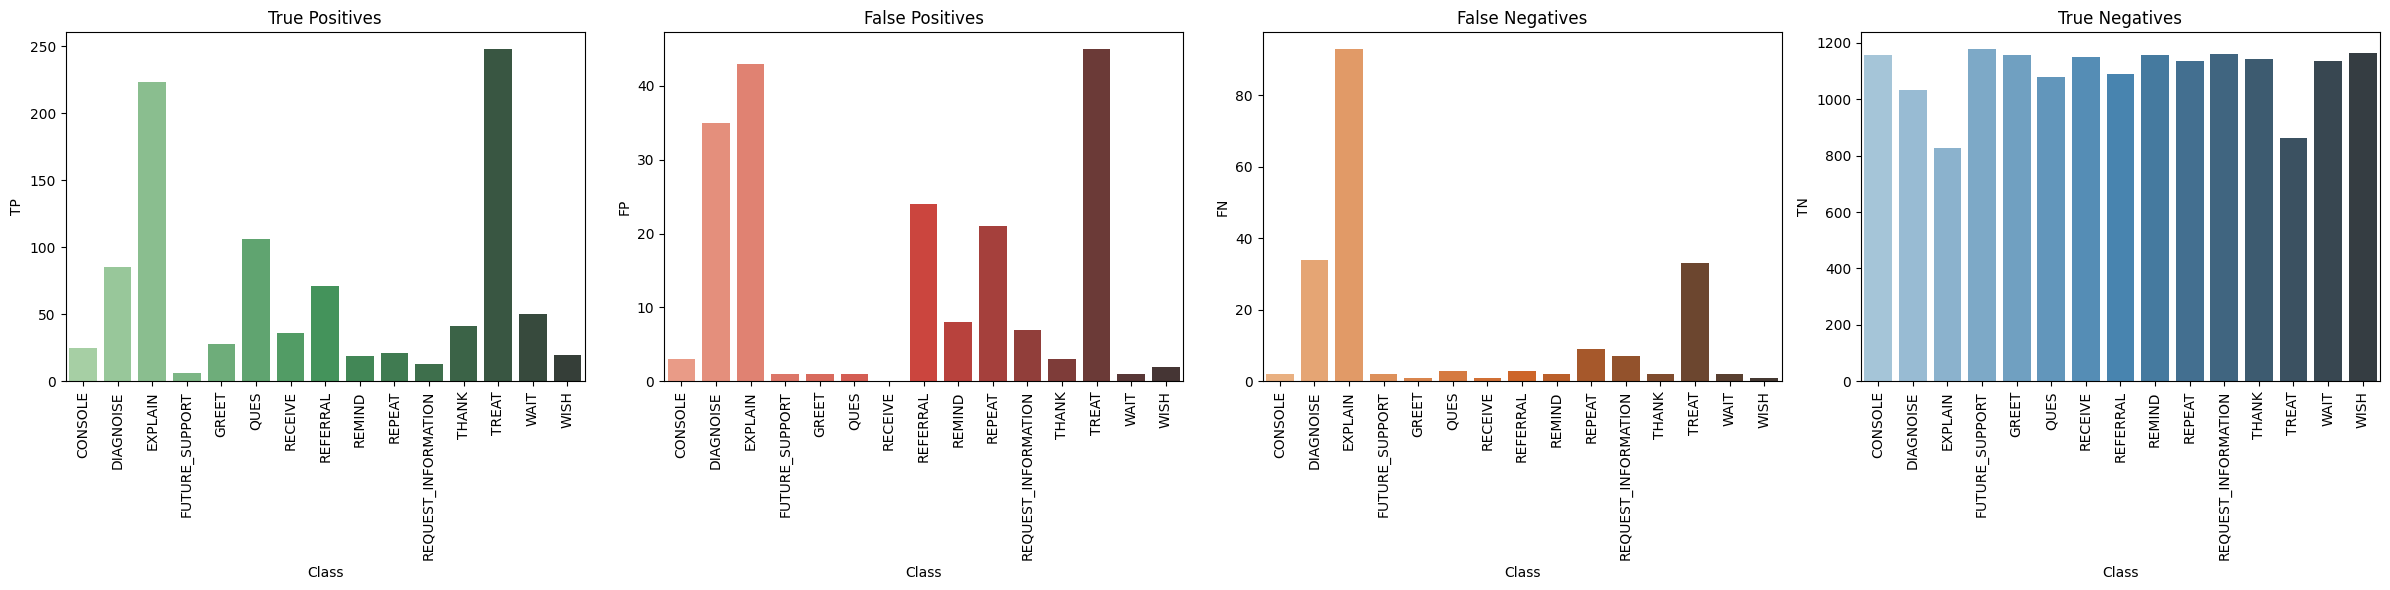

In [ ]:
# Heatmap of TP, FP, FN, TN

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

sns.barplot(x='Class', y='TP', data=metrics_df, ax=axes[0], palette="Greens_d")
axes[0].set_title('True Positives')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x='Class', y='FP', data=metrics_df, ax=axes[1], palette="Reds_d")
axes[1].set_title('False Positives')
axes[1].tick_params(axis='x', rotation=90)

sns.barplot(x='Class', y='FN', data=metrics_df, ax=axes[2], palette="Oranges_d")
axes[2].set_title('False Negatives')
axes[2].tick_params(axis='x', rotation=90)

sns.barplot(x='Class', y='TN', data=metrics_df, ax=axes[3], palette="Blues_d")
axes[3].set_title('True Negatives')
axes[3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


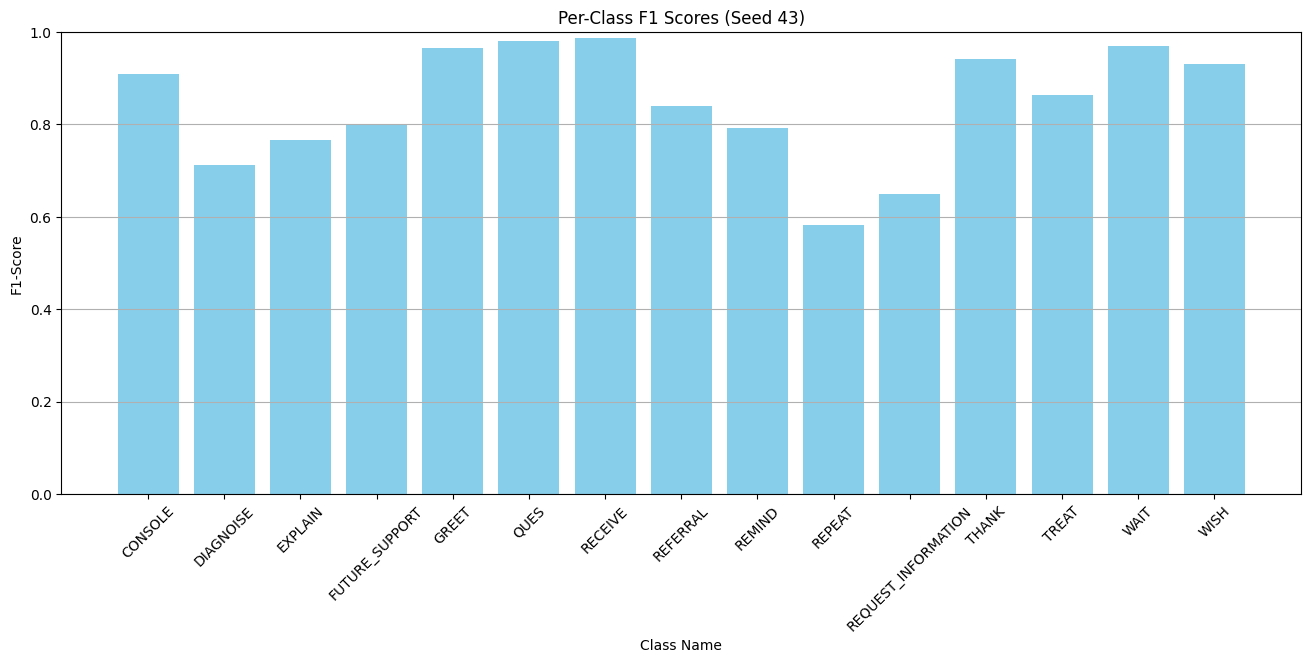

In [ ]:
from sklearn.metrics import classification_report

# Get classification report dictionary
report = classification_report(true_labels, pred_labels, output_dict=True)

# Extract F1 scores
f1_scores = []
for idx in range(15):
    f1 = report[str(idx)]['f1-score']
    f1_scores.append(f1)

# Plot
plt.figure(figsize=(16, 6))
plt.bar(label_names, f1_scores, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('F1-Score')
plt.title('Per-Class F1 Scores (Seed 43)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [ ]:
# Assume model, tokenizer, id_to_label, device already defined

# Predict function
def predict_sentence(sentence):
    model.eval()
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=80)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1)
        predicted_class = torch.argmax(probs, dim=1).item()

    print(f"\n Sentence: {sentence}")
    print(f" Predicted Label: {id_to_label[predicted_class]}")

# Continuous prediction loop
while True:
    sentence = input("\nType a medical sentence (or type 'exit' to stop):\n")
    if sentence.lower() == 'exit':
        print("Exiting demo. ")
        break
    predict_sentence(sentence)



 Sentence: Based on your blood test, it appears you might have a mild infection.
 Predicted Label: DIAGNOISE
